In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kneed import KneeLocator

#Loading dataset
file_path = r'C:\Users\snehi\Documents\CDA_Assignments\Assignment 2\processed_data_final.csv' 
df = pd.read_csv(file_path)
# Peek at the first few rows
print(df.head())

# Check basic info
print("\nShape of dataset:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())


   X  HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  HR_TD_AUC  \
0  0    1.849980      1.866246   1.329427   1.953730   1.423449   2.030886   
1  1    1.663456      1.858804   0.350151   2.228858   0.851930   2.256761   
2  2    1.806905      1.967124   0.369455   2.485787   0.878394   1.355878   
3  3    2.237394      2.459939   1.306133   2.186036   1.628407   2.495749   
4  4    1.289249      1.552862   0.471980   1.707506   0.719607   2.031791   

   HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  ...  upset  hostile  alert  \
0        0.331132    3.156373         6.737563  ...      1        1      2   
1        0.837429    3.118476         7.683276  ...      2        1      3   
2        0.615678    2.424463         6.993161  ...      1        1      2   
3        0.465671    2.651472         7.414898  ...      1        1      2   
4        1.104152    2.026465         7.651326  ...      3        1      3   

   ashamed  inspired  nervous  attentive  afraid  active  dete

In [45]:
# Dropping metadata + target columns
meta_cols = ['X', 'Round', 'Phase', 'Individual', 'Puzzler', 'Cohort']
emotion_targets = ['Frustrated', 'upset', 'hostile', 'alert', 'ashamed', 
                   'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']

# Select biosignal feature columns
feature_cols = [col for col in df.columns if col not in meta_cols + emotion_targets]

# Extract only the feature data
X = df[feature_cols]

# Confirm selection
print(f"\nSelected {len(feature_cols)} feature columns for PCA.")
print(feature_cols)



Selected 51 feature columns for PCA.
['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope', 'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_ReT']


In [47]:
from sklearn.preprocessing import StandardScaler
# Standardize the biosignal features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: turn back into DataFrame to inspect
import numpy as np
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

print(X_scaled_df.head())


   HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  HR_TD_AUC  \
0    0.010023     -0.062352   0.187214  -0.163880   0.001629  -0.312526   
1   -0.176801     -0.069806  -0.793634   0.111690  -0.570809  -0.086288   
2   -0.033122      0.038688  -0.774299   0.369032  -0.544302  -0.988619   
3    0.398059      0.532294   0.163883   0.068800   0.206917   0.153083   
4   -0.551609     -0.376240  -0.671610  -0.410499  -0.703343  -0.311621   

   HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  HR_TD_Slope_max  ...  \
0       -0.621392   -0.007322        -0.414857         0.978121  ...   
1       -0.114281   -0.045281         0.532375        -0.699948  ...   
2       -0.336389   -0.740408        -0.158848        -0.343025  ...   
3       -0.486637   -0.513035         0.263566         0.280258  ...   
4        0.152870   -1.139046         0.500374        -0.385643  ...   

   EDA_TD_T_AUC  EDA_TD_T_Kurtosis  EDA_TD_T_Skew  EDA_TD_T_Slope_min  \
0     -0.674626           0.276417      -1.

In [49]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create PCA DataFrame (first 16 PCs)
X_pca_df = pd.DataFrame(X_pca[:, :16], columns=[f'PC{i+1}' for i in range(16)])

#loading the PCAs to DataFrame
loadings = pd.DataFrame(
    pca.components_.T,
    index=feature_cols,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Show the first few rows
print(X_pca_df.head())

# Show dimensions
print("\nShape of X_pca_df:", X_pca_df.shape)

# Show column names
print("\nColumns in X_pca_df:")
print(X_pca_df.columns.tolist())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.153586 -1.108992 -2.036223 -1.207688  0.011654 -2.081074  1.755169   
1 -3.298740  0.213191 -0.897435  0.232659  0.102085  1.100565  0.943872   
2 -3.879928  0.141004 -1.572204 -0.192093 -0.282043 -0.674310  1.832053   
3 -3.554013 -0.990660  0.715249  1.385246  1.176045  3.595122  3.160535   
4 -3.609905  0.046400 -2.311799 -1.346391  0.611812 -0.144414  0.669011   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  1.772611  2.295674 -0.167037 -0.586175  0.587230 -0.675358  0.791976   
1 -1.228811 -0.325129 -0.270919 -0.211346  0.702469  0.290223 -0.007949   
2 -1.310365 -0.579649  0.187058 -0.425621  0.430446  1.620813 -0.719748   
3  0.133069 -0.945779  1.025029  0.032999 -0.674708  0.178730 -1.096336   
4 -1.005793 -0.208195  0.018004 -0.729609 -0.428379  1.116704 -0.340461   

       PC15      PC16  
0  0.308151  1.314832  
1  0.857004 -1.136344  
2  0.300603  0.972886  
3 

Elbow detected at PC16
Explained variance at elbow: 89.90%
Number of components to keep: 16


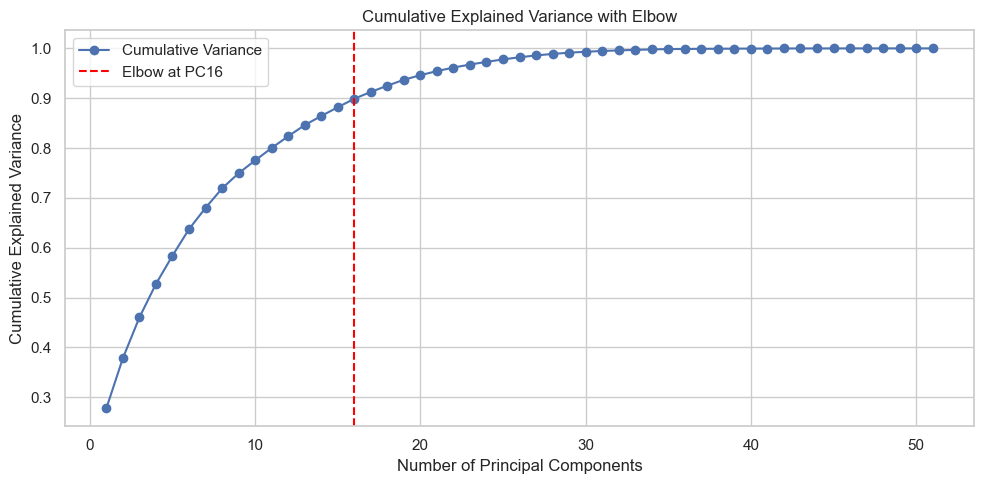

In [51]:
# Add metadata and emotion columns for plotting
X_pca_df['Phase'] = df['Phase']
for emo in emotion_targets:
    X_pca_df[emo] = df[emo]

# Scree Plot with Elbow Detection
cum_var = np.cumsum(pca.explained_variance_ratio_)
components = np.arange(1, len(cum_var) + 1)
knee = KneeLocator(components, cum_var, curve='concave', direction='increasing')
elbow_point = knee.knee
elbow_variance = cum_var[elbow_point - 1]

print(f"Elbow detected at PC{elbow_point}")
print(f"Explained variance at elbow: {elbow_variance:.2%}")
print(f"Number of components to keep: {elbow_point}")

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
plt.plot(components, cum_var, marker='o', label='Cumulative Variance')
plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Elbow at PC{elbow_point}')
plt.title('Cumulative Explained Variance with Elbow')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.tight_layout()
plt.show()


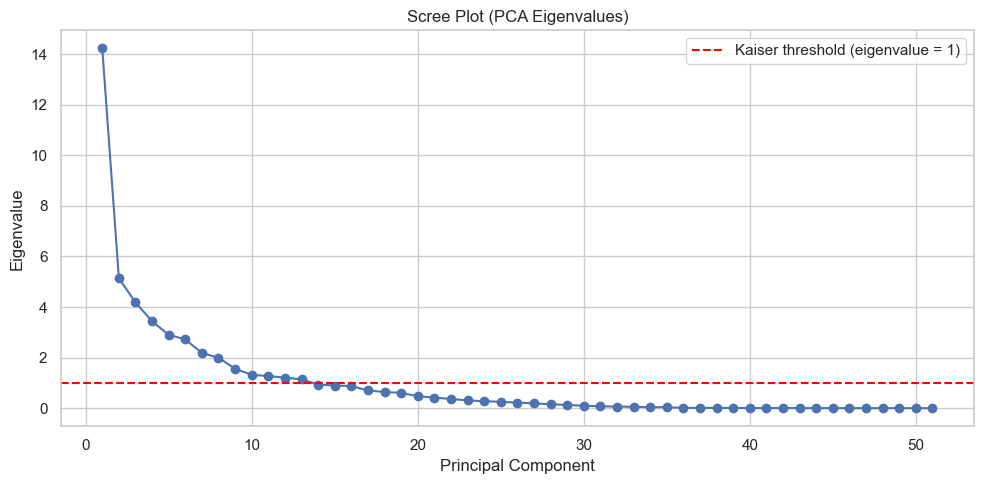

13 components have eigenvalues > 1


In [53]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

# Fit PCA on scaled features
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot eigenvalues (not ratios)
eigenvalues = pca.explained_variance_

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.axhline(y=1, color='red', linestyle='--', label='Kaiser threshold (eigenvalue = 1)')
plt.title('Scree Plot (PCA Eigenvalues)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.tight_layout()
plt.show()

num_above_1 = sum(eigenvalues > 1)
print(f"{num_above_1} components have eigenvalues > 1")



In [55]:
np.cumsum(pca.explained_variance_ratio_)


array([0.27810621, 0.37858875, 0.46035015, 0.52744813, 0.58418799,
       0.63734865, 0.68002201, 0.71902507, 0.74950402, 0.77525084,
       0.80014267, 0.82375951, 0.84608735, 0.86436658, 0.88188263,
       0.89896105, 0.9126677 , 0.92516083, 0.9370554 , 0.94626993,
       0.95443326, 0.9615661 , 0.96758638, 0.97295759, 0.97792475,
       0.98216675, 0.98591879, 0.98889483, 0.99142163, 0.99329585,
       0.99476983, 0.99600359, 0.99708437, 0.99790182, 0.9986192 ,
       0.99888125, 0.99911359, 0.99932206, 0.9994961 , 0.99961749,
       0.99972728, 0.99982213, 0.99987151, 0.99990822, 0.99994175,
       0.99996325, 0.99998264, 0.99999008, 0.99999474, 0.99999874,
       1.        ])

In [49]:
- Get to understand which PC do we actually need to use

- Sparse PCA

_ visualise teh results (Biplot)

-----------------------------

1. Exploratory PCA
Scree plot + elbow

Plot PC1 vs PC2 (color by Phase, Frustrated, etc.)

Show loadings for PC1–PC3

******************************
    
2. Modeling with PCA
Use top 16 PCs

Run linear regression / PLS for each y_j

Compare RMSE or R² across methods and emotion variables

SyntaxError: invalid syntax (215183477.py, line 1)

C:\Users\snehi\AppData\Local\Temp\ipykernel_27596\4056008544.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette=colors)


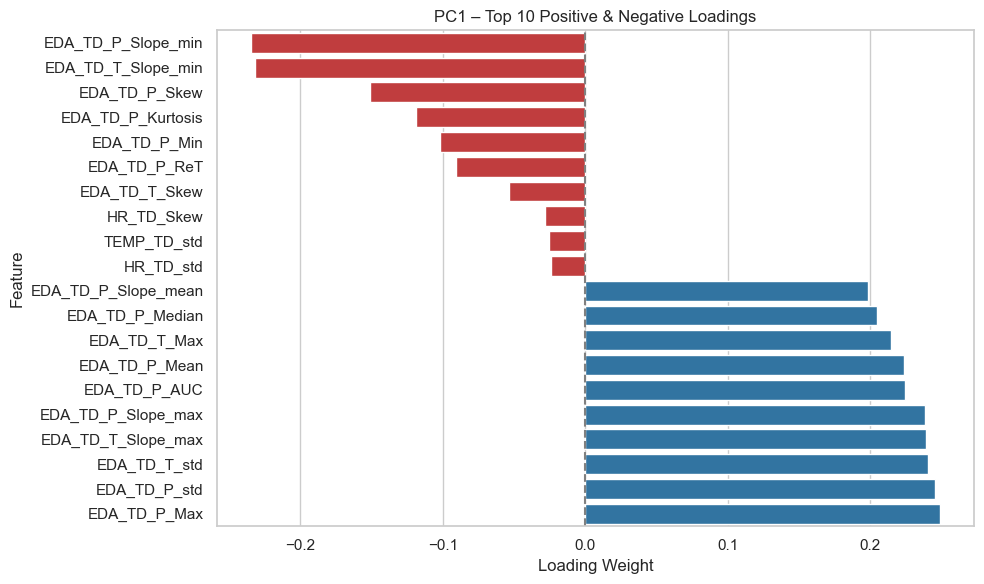

C:\Users\snehi\AppData\Local\Temp\ipykernel_27596\4056008544.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette=colors)


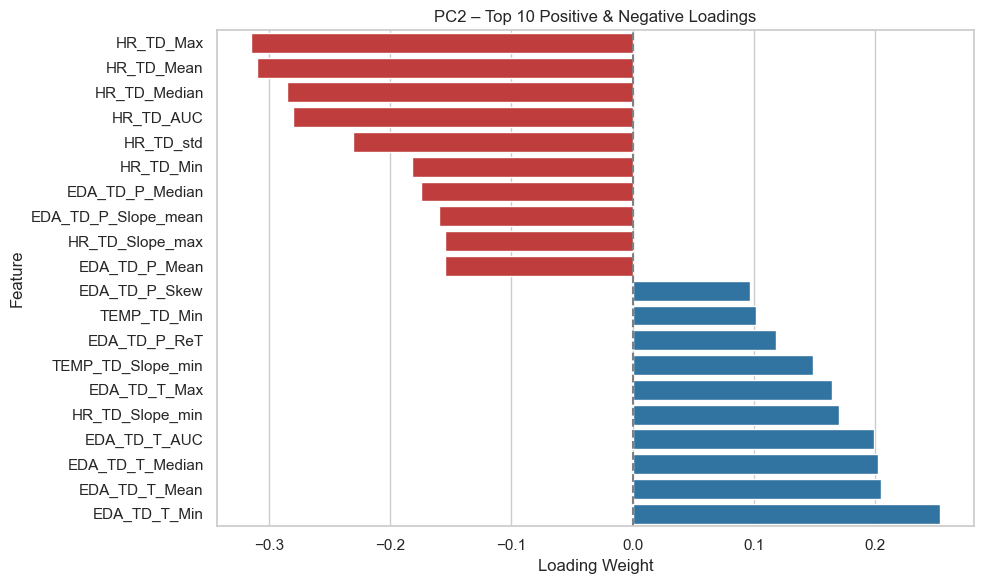

C:\Users\snehi\AppData\Local\Temp\ipykernel_27596\4056008544.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette=colors)


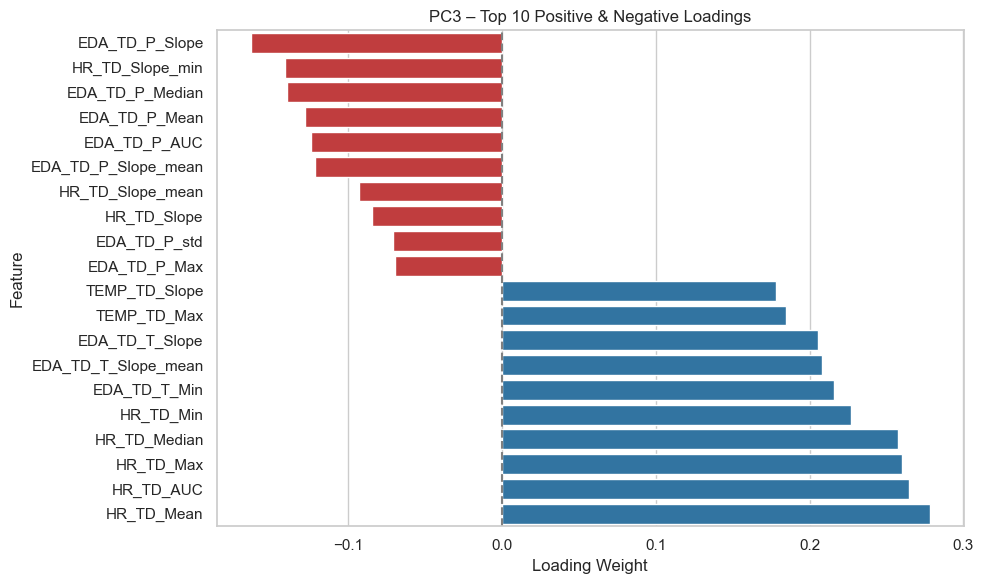

In [57]:
def plot_loadings(pc_num, top_n=10):
    pc = f'PC{pc_num}'
    sorted_loads = loadings[pc].sort_values()
    top_features = pd.concat([sorted_loads.head(top_n), sorted_loads.tail(top_n)])
    colors = ['#d62728' if v < 0 else '#1f77b4' for v in top_features]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_features.values, y=top_features.index, palette=colors)
    plt.axvline(0, color='gray', linestyle='--')
    plt.title(f'{pc} – Top {top_n} Positive & Negative Loadings')
    plt.xlabel('Loading Weight')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# For PC1, PC2, PC3
plot_loadings(1)
plot_loadings(2)
plot_loadings(3)


In [109]:
pca_description = """
Principal Component 1 (PC1) primarily captures electrodermal activity (EDA) variability and intensity, 
with strong positive loadings from features such as `EDA_TD_P_Max`, `EDA_TD_P_std`, and `EDA_TD_P_AUC`, 
indicating that higher PC1 scores reflect elevated sympathetic responses and cumulative skin conductance responses. 

Principal Component 2 (PC2) contrasts cardiovascular reactivity against thermal and EDA steadiness; 
it has strong negative loadings from heart rate features (`HR_TD_Max`, `HR_TD_Mean`, `HR_TD_AUC`) 
and positive loadings from temperature and low-intensity EDA features, suggesting that PC2 differentiates 
between high heart-rate-driven responses and lower-response, thermally stable states. 

Principal Component 3 (PC3) emphasizes cardiovascular activation and thermoregulatory response, 
with high positive loadings from `HR_TD_Mean`, `TEMP_TD_Max`, and `EDA_TD_T_Slope`, while EDA slope 
and mean features load negatively, implying that PC3 reflects a physiological response pattern 
driven more by heart and temperature modulation than by EDA dynamics. 

Together, these components represent orthogonal axes of autonomic reactivity spanning 
EDA-dominant response (PC1), cardiac vs. calm-state contrast (PC2), and thermal-cardiovascular engagement (PC3).
"""

print(pca_description)


Principal Component 1 (PC1) primarily captures electrodermal activity (EDA) variability and intensity, 
with strong positive loadings from features such as `EDA_TD_P_Max`, `EDA_TD_P_std`, and `EDA_TD_P_AUC`, 
indicating that higher PC1 scores reflect elevated sympathetic responses and cumulative skin conductance responses. 

Principal Component 2 (PC2) contrasts cardiovascular reactivity against thermal and EDA steadiness; 
it has strong negative loadings from heart rate features (`HR_TD_Max`, `HR_TD_Mean`, `HR_TD_AUC`) 
and positive loadings from temperature and low-intensity EDA features, suggesting that PC2 differentiates 
between high heart-rate-driven responses and lower-response, thermally stable states. 

Principal Component 3 (PC3) emphasizes cardiovascular activation and thermoregulatory response, 
with high positive loadings from `HR_TD_Mean`, `TEMP_TD_Max`, and `EDA_TD_T_Slope`, while EDA slope 
and mean features load negatively, implying that PC3 reflects a physiological r

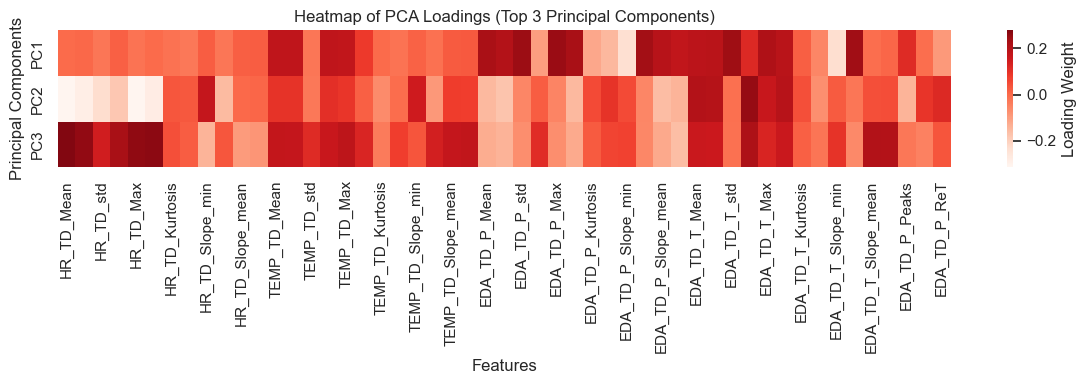

In [160]:
# HEATMAPS
# Select ALL PCs
selected_pcs = loadings.columns[:3].tolist()  # Assumes PCs are ordered

# Extract and transpose for heatmap
heatmap_data = loadings[selected_pcs].T

# Plot Heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(
    heatmap_data,
    cmap='Reds',
    center=0,
    annot=False,
    cbar_kws={'label': 'Loading Weight'}
)
plt.title('Heatmap of PCA Loadings (Top 3 Principal Components)')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


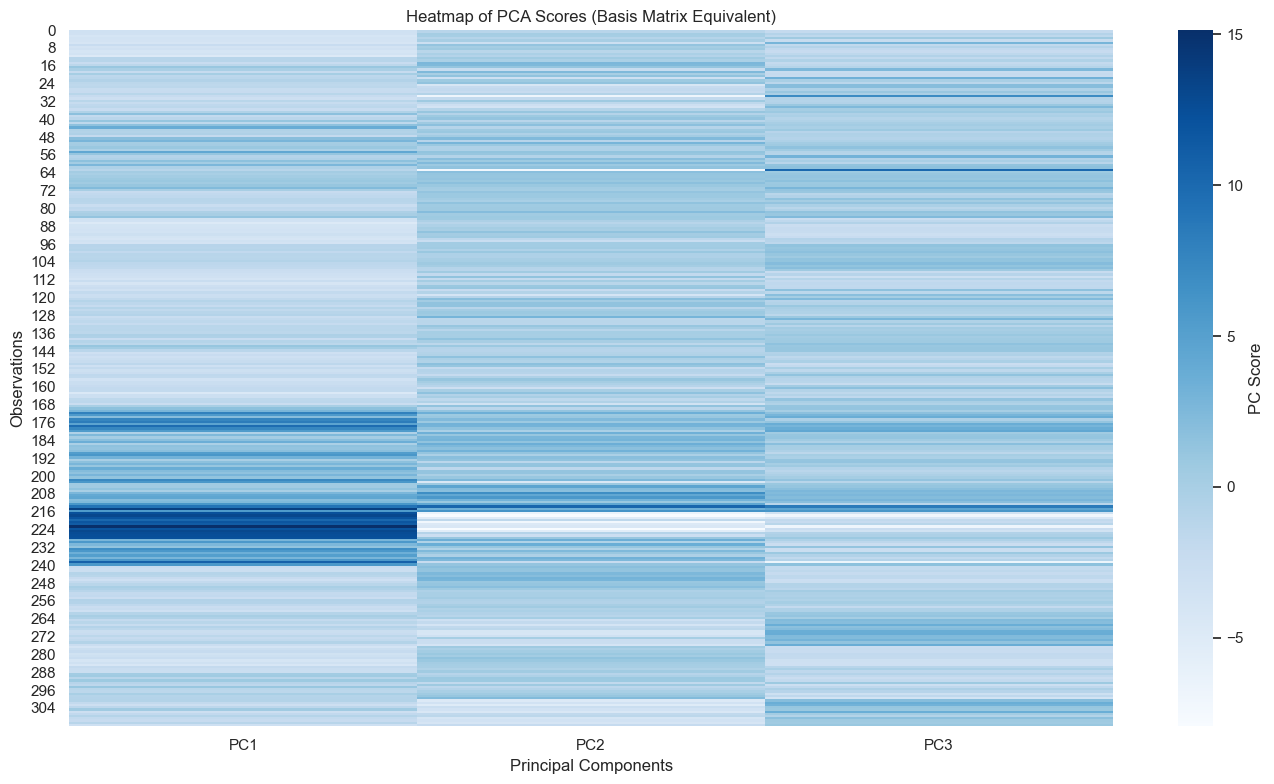

 Figure X displays a heatmap of the PCA scores across the top 16 principal components for all observations. Each row represents an individual sample, and each column corresponds to a principal component. Most observations exhibit moderate scores (lighter shades), suggesting a relatively even distribution across the major components. Notably, PCs 1 and 2 show stronger variability, with certain observations (especially between indices 200 and 230) displaying extreme positive or negative scores. In contrast, the later components (e.g., PC12 to PC16) contribute minimally, indicating diminishing variance captured beyond the early principal components. This pattern aligns with typical PCA behavior where early components explain most of the dataset structure, while later components capture residual noise or fine-grained variation.


In [158]:
# Plot the heatmap of PCA scores
plt.figure(figsize=(14, 8))
sns.heatmap(
    X_pca_df.iloc[:, :3],  # Use the top 3 PCs
    cmap='Blues',           # Similar to your NMF plot
    cbar_kws={'label': 'PC Score'}
)
plt.title('Heatmap of PCA Scores (Basis Matrix Equivalent)')
plt.xlabel('Principal Components')
plt.ylabel('Observations')
plt.tight_layout()
plt.show()

hmap = """ Figure X displays a heatmap of the PCA scores across the top 16 principal components for all observations. Each row represents an individual sample, and each column corresponds to a principal component. Most observations exhibit moderate scores (lighter shades), suggesting a relatively even distribution across the major components. Notably, PCs 1 and 2 show stronger variability, with certain observations (especially between indices 200 and 230) displaying extreme positive or negative scores. In contrast, the later components (e.g., PC12 to PC16) contribute minimally, indicating diminishing variance captured beyond the early principal components. This pattern aligns with typical PCA behavior where early components explain most of the dataset structure, while later components capture residual noise or fine-grained variation."""

print(hmap)

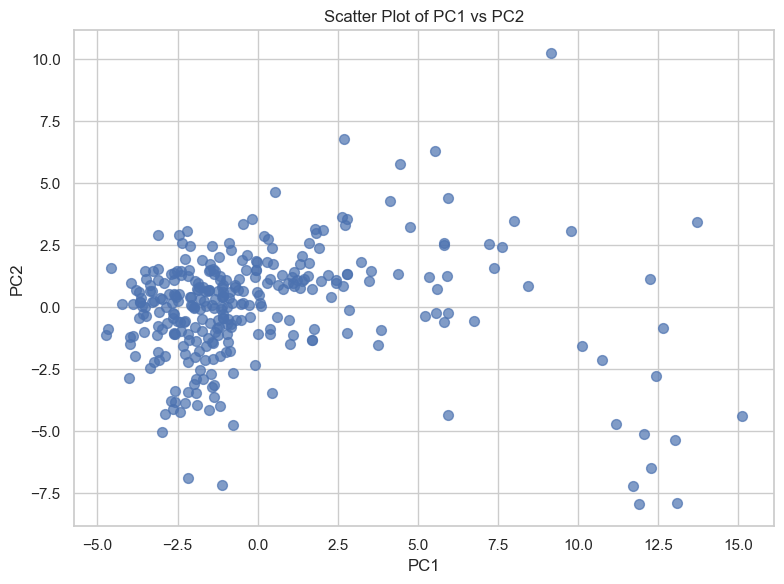

In [172]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_df['PC1'], X_pca_df['PC2'], alpha=0.7, s=50)
plt.title('Scatter Plot of PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\snehi\AppData\Local\Temp\ipykernel_27596\560785043.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette=colors)


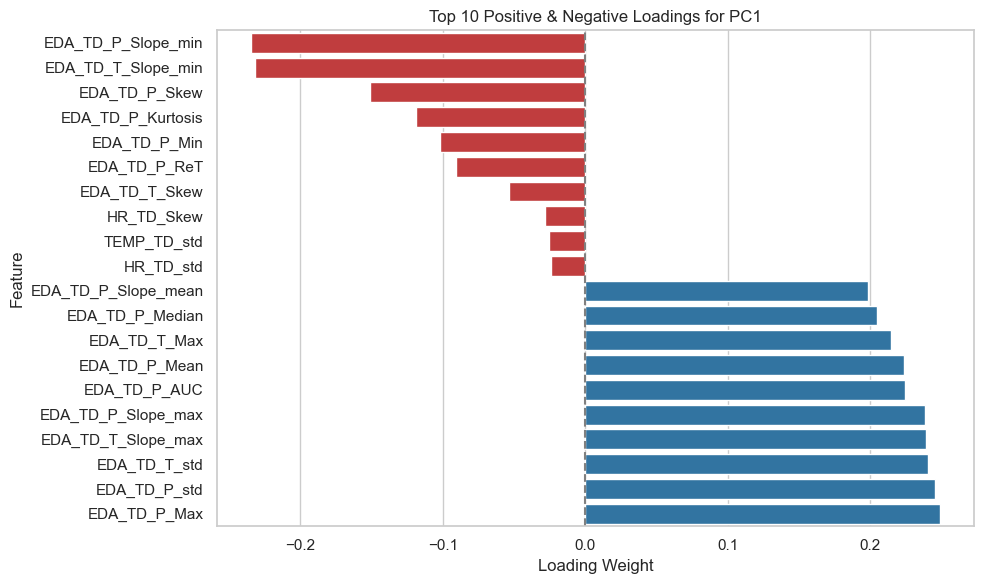

C:\Users\snehi\AppData\Local\Temp\ipykernel_27596\560785043.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette=colors)


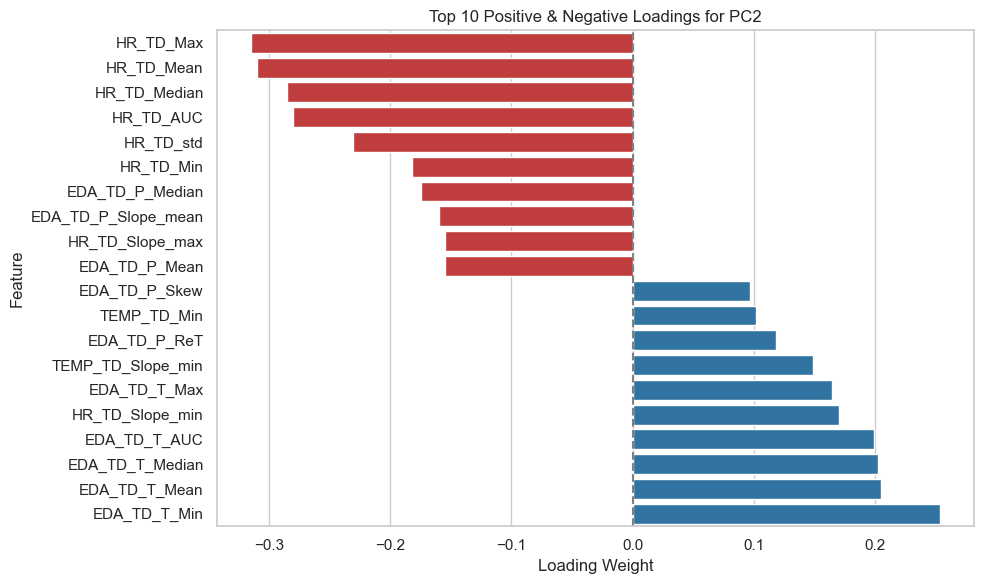

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_loadings(pc_num, top_n=10):
    pc = f'PC{pc_num}'
    
    # Sort loadings
    sorted_loads = loadings[pc].sort_values()
    
    # Select top positive and top negative features
    top_features = pd.concat([sorted_loads.head(top_n), sorted_loads.tail(top_n)])
    colors = ['#d62728' if v < 0 else '#1f77b4' for v in top_features]

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_features.values, y=top_features.index, palette=colors)
    plt.axvline(0, color='gray', linestyle='--')
    plt.title(f'Top {top_n} Positive & Negative Loadings for {pc}')
    plt.xlabel('Loading Weight')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# Plot for PC1
plot_top_loadings(1)

# Plot for PC2
plot_top_loadings(2)


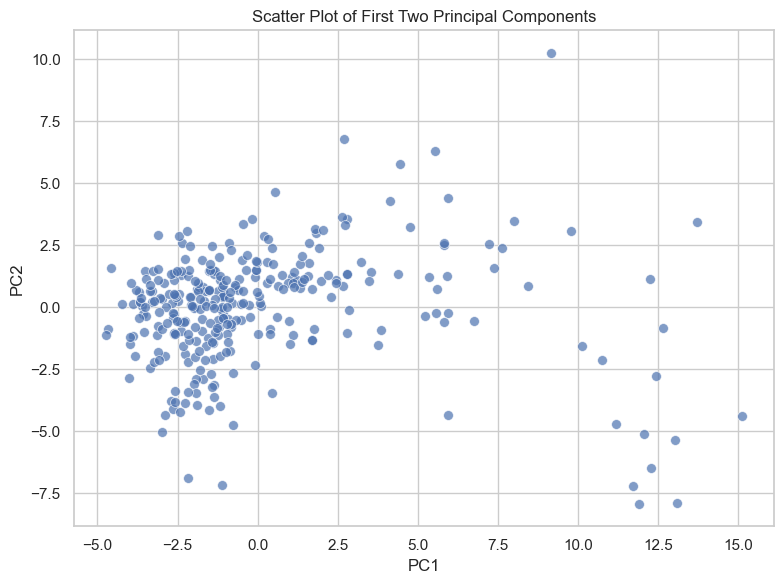

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `X_pca_df` is your PCA-reduced DataFrame with columns ['PC1', 'PC2', ...]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=X_pca_df, s=50, alpha=0.7)
plt.title("Scatter Plot of First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


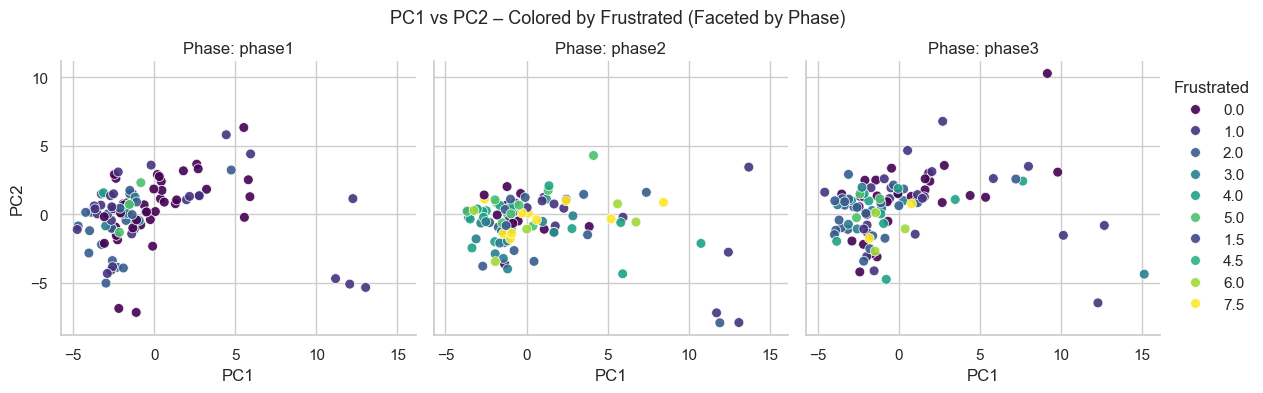

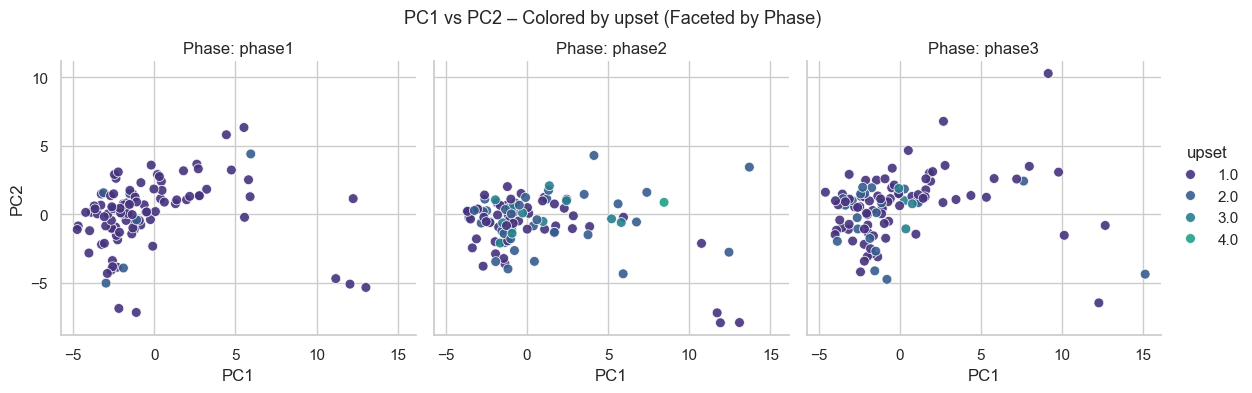

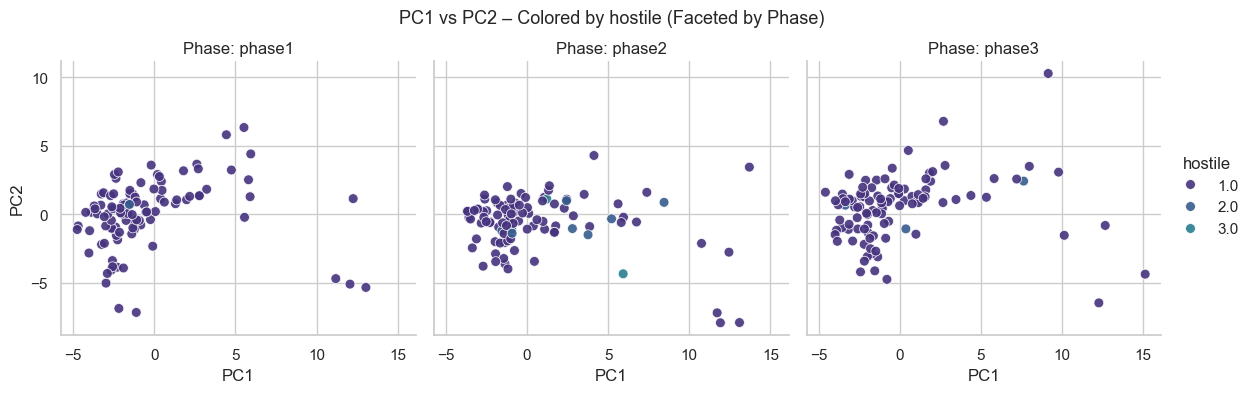

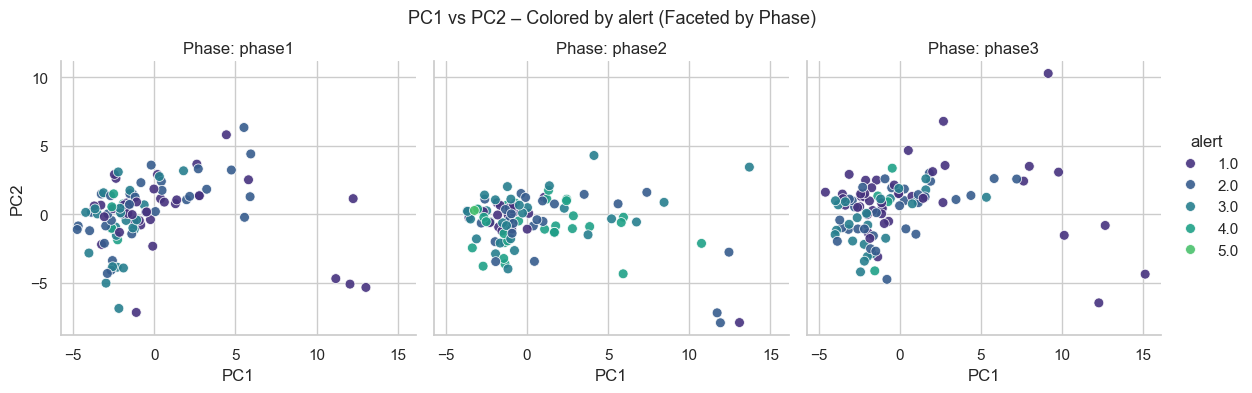

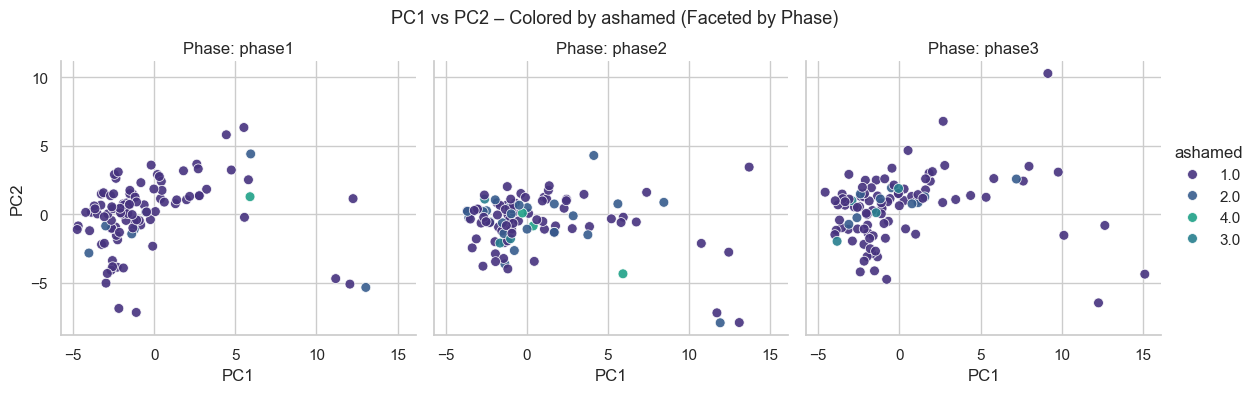

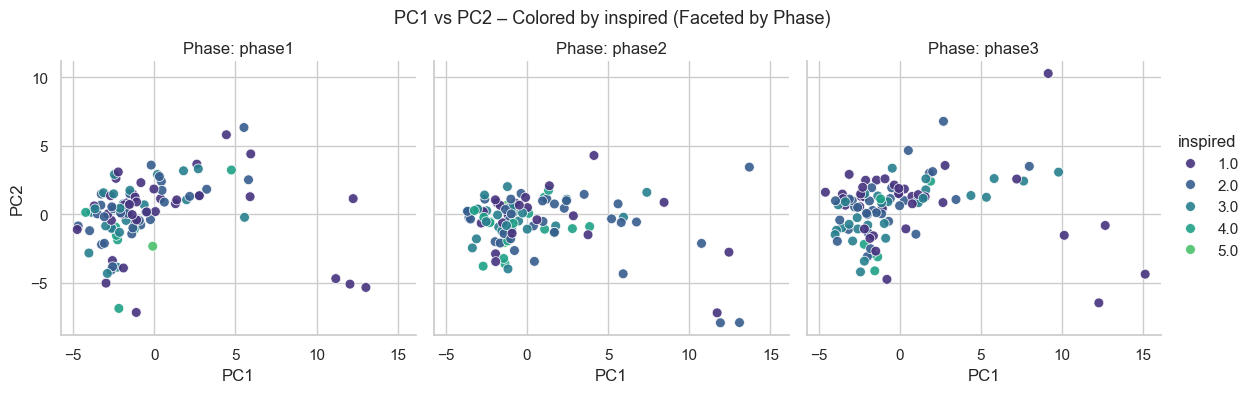

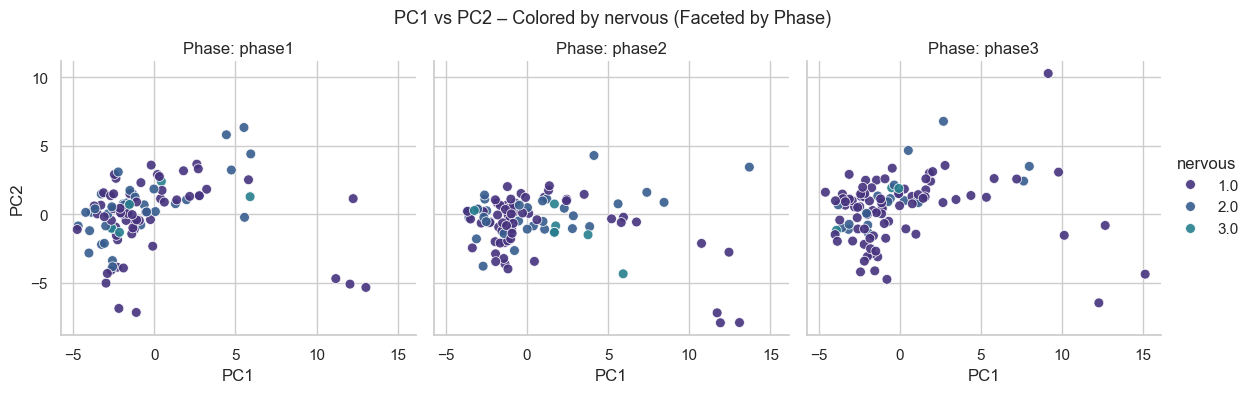

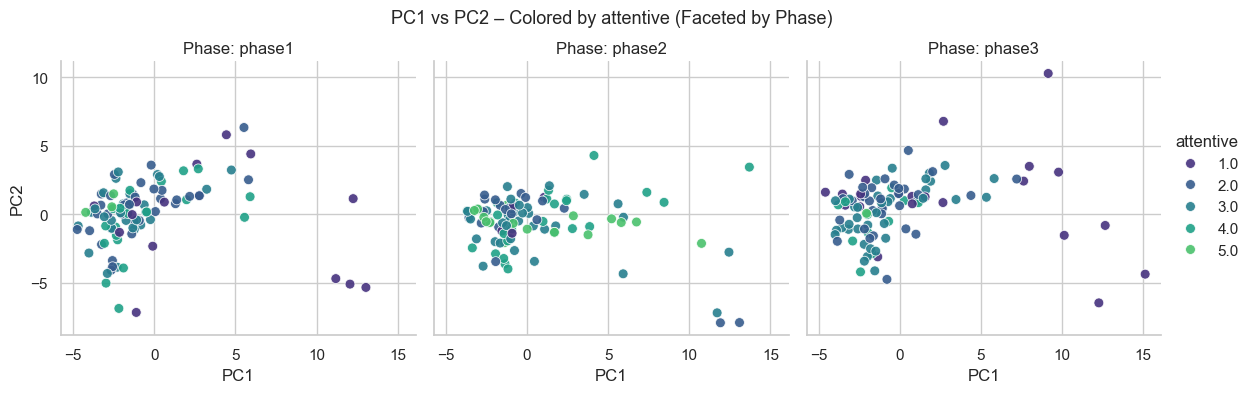

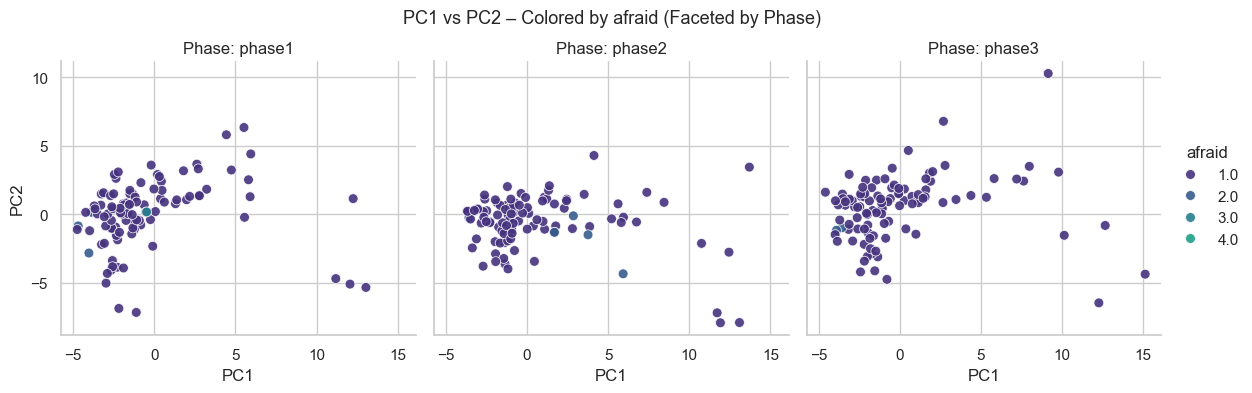

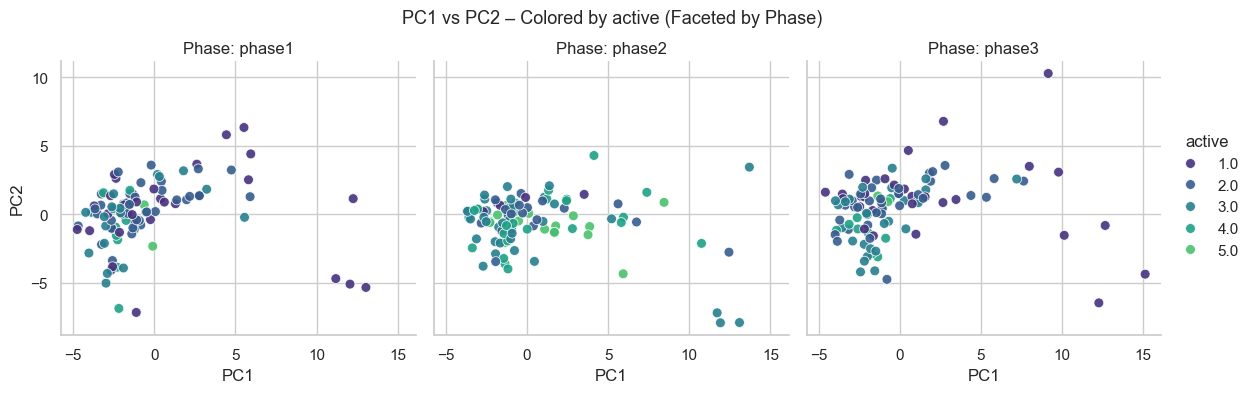

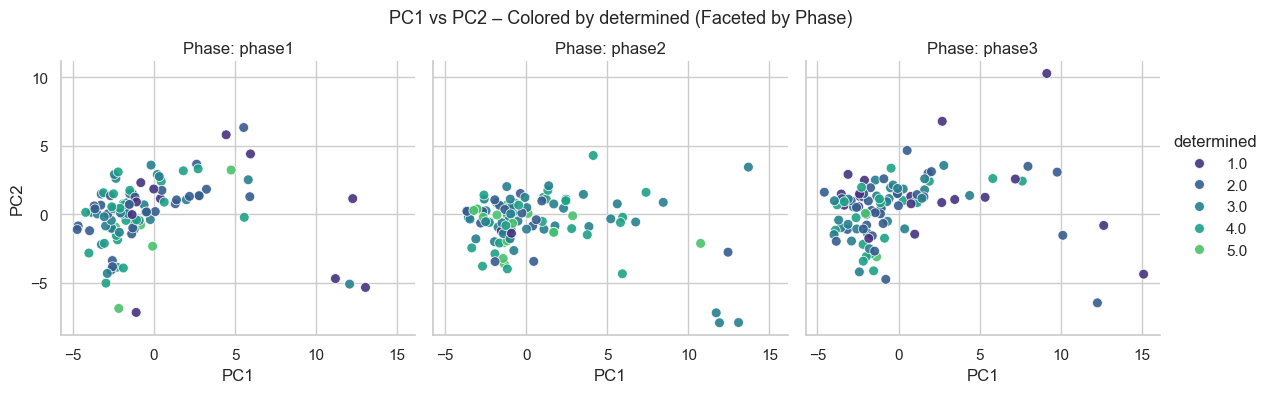

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# Ensure emotion scores and Phase are in your PCA dataframe
emotion_cols = ['Frustrated', 'upset', 'hostile', 'alert', 'ashamed',
                'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']

X_pca_df['Phase'] = df['Phase']  # Add Phase for faceting

global_min = 0
global_max = 7  

# Ensure correct phase order
phase_order = CategoricalDtype(categories=['phase1', 'phase2', 'phase3'], ordered=True)
X_pca_df['Phase'] = X_pca_df['Phase'].astype(phase_order)

for emo in emotion_cols:
    X_pca_df[emo] = df[emo].astype(float)

    g = sns.FacetGrid(X_pca_df, col='Phase', height=4, aspect=1)
    g.map_dataframe(
        sns.scatterplot,
        x='PC1', y='PC2',
        hue=emo,
        palette='viridis',
        s=50, alpha=0.9,
        hue_norm=(global_min, global_max)  
    )

    g.add_legend(title=emo)
    g.set_axis_labels('PC1', 'PC2')
    g.set_titles(col_template='Phase: {col_name}')
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f'PC1 vs PC2 – Colored by {emo} (Faceted by Phase)', fontsize=13)
    plt.show()




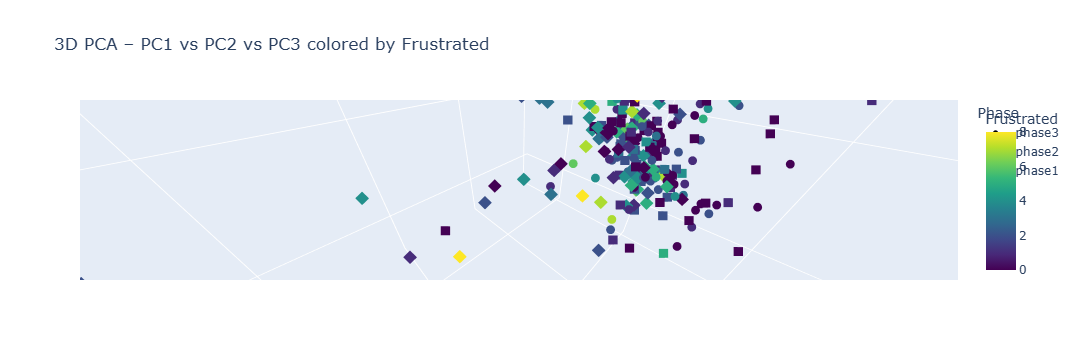

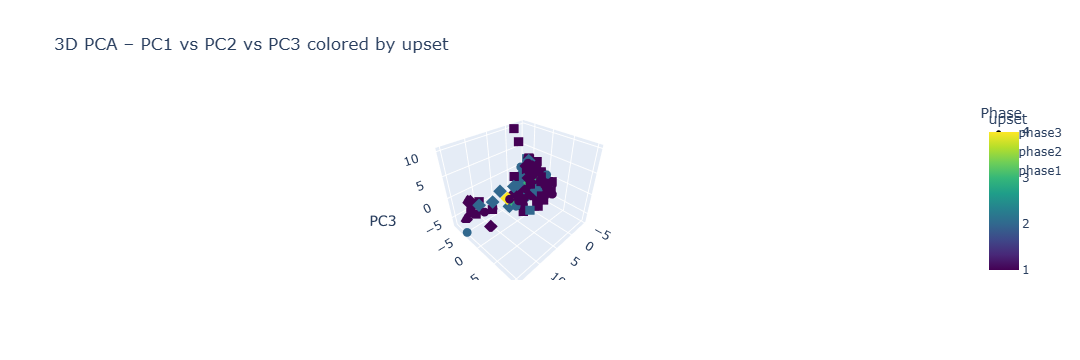

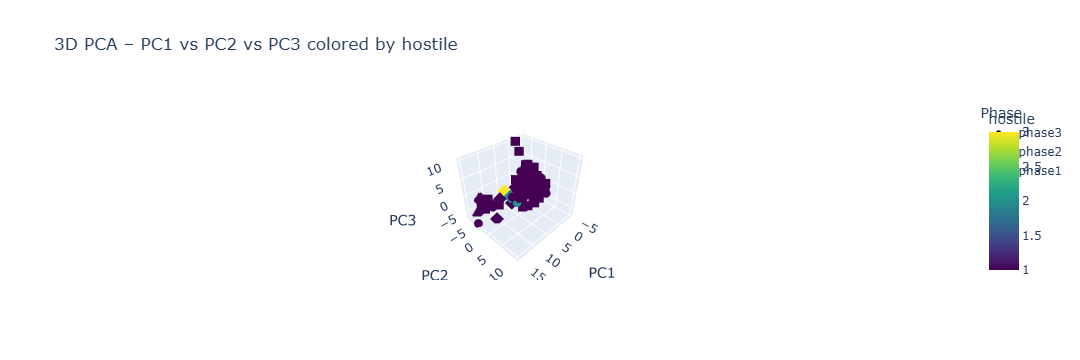

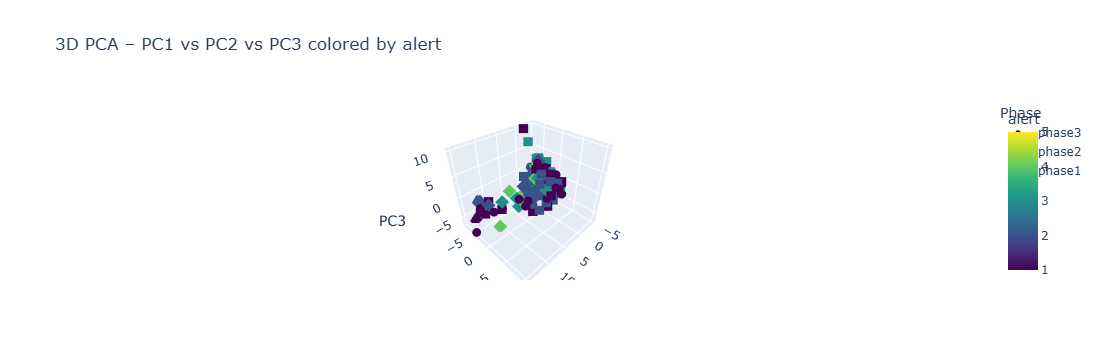

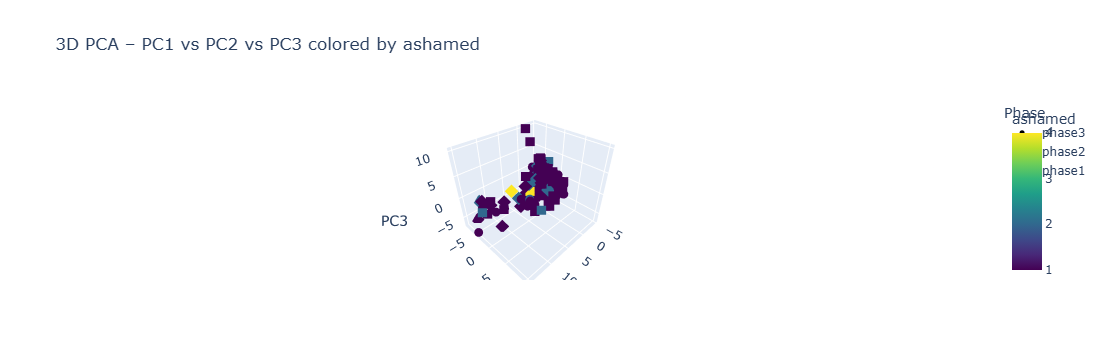

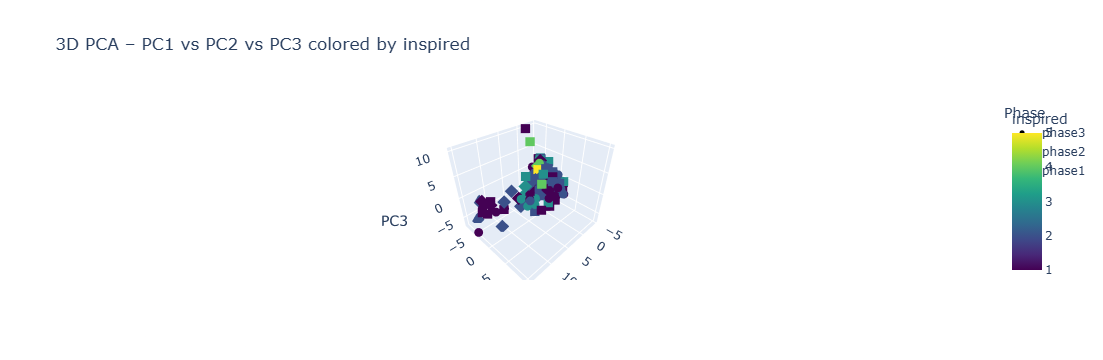

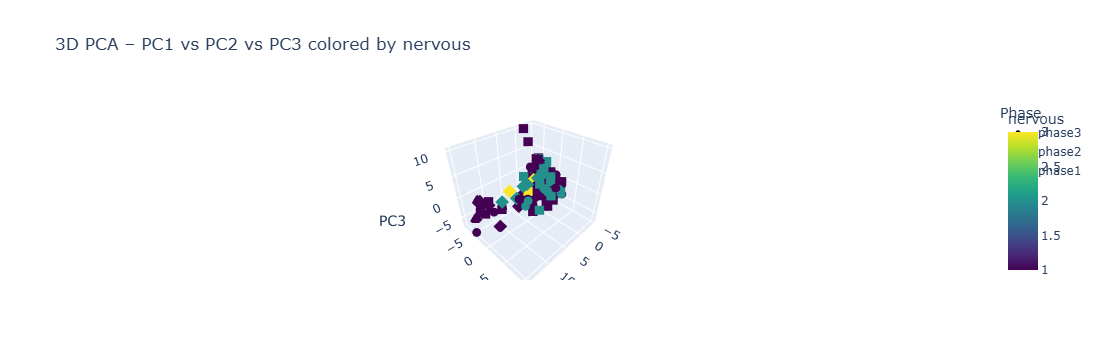

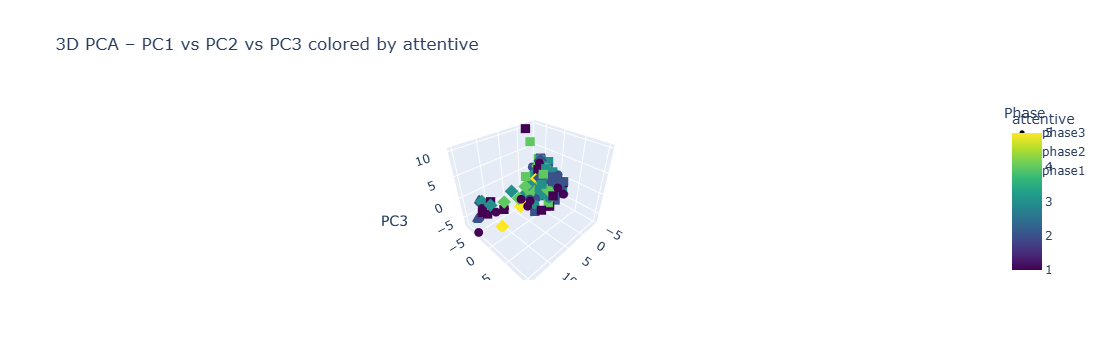

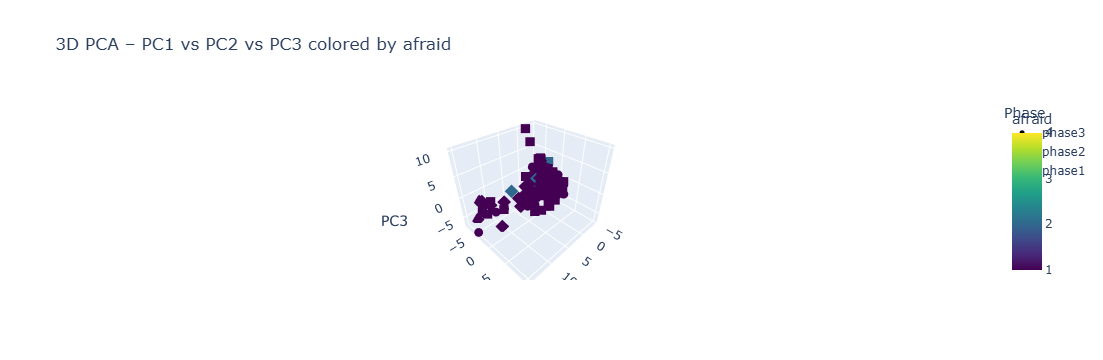

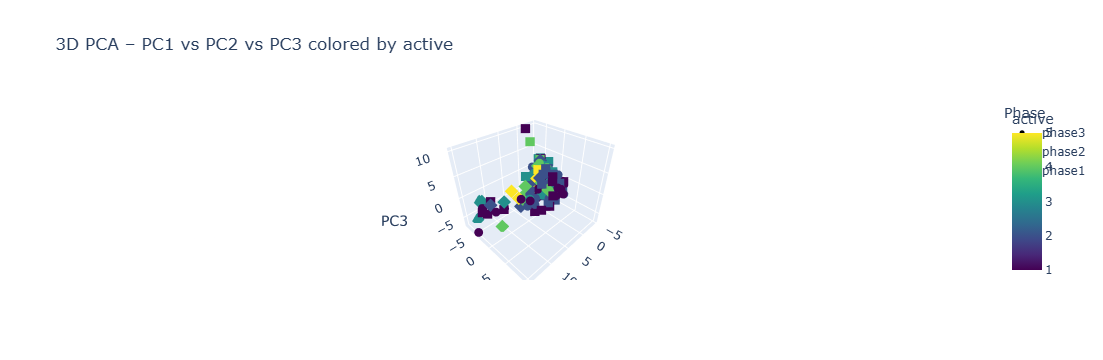

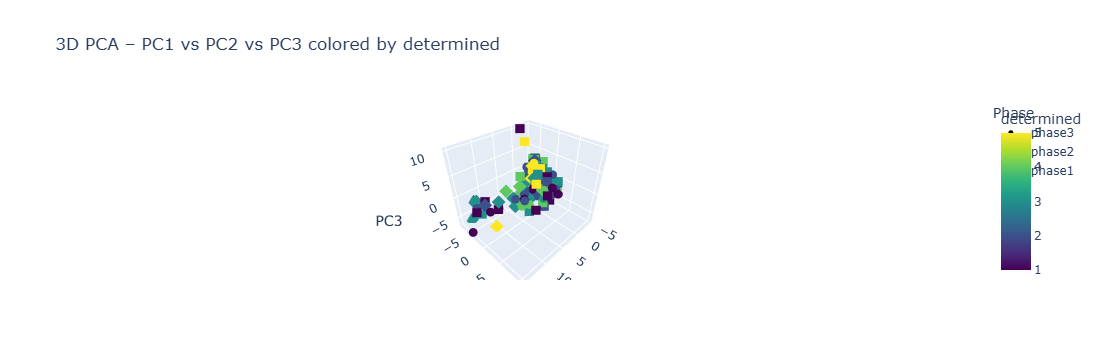

In [131]:
#Not sure how relevant this would be - still need to look into it
import plotly.express as px

# Loop over each emotion and generate 3D PCA plot
for emo in emotion_targets:
    fig = px.scatter_3d(
        X_pca_df,
        x='PC1', y='PC2', z='PC3',
        color=emo,
        symbol='Phase',
        title=f'3D PCA – PC1 vs PC2 vs PC3 colored by {emo}',
        color_continuous_scale='Viridis'
    )

    fig.update_traces(marker=dict(size=5))
    fig.show()


In [89]:
# Assuming emotion_targets = list of 11 emotions

# Concatenate reduced PCs and original emotions
pca_reduced_full = pd.concat([X_pca_df.iloc[:, :16], df[emotion_targets]], axis=1)

# Save to CSV
pca_reduced_full.to_csv('pca_reduced_data.csv', index=False)

print("Saved PCA reduced dataset with PCs + emotions!")


Saved PCA reduced dataset with PCs + emotions!


In [131]:
#Original Dataset
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# Define
X_original = df[feature_cols]
Y = df[emotion_targets]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_original = {}

for emo in emotion_targets:
    y = Y[emo]

    model = LinearRegression()

    r2_scores = []
    rmse_scores = []

    for train_idx, test_idx in kf.split(X_original):
        X_train, X_test = X_original.iloc[train_idx], X_original.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2_scores.append(r2_score(y_test, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    results_original[emo] = {
        'R2_mean': np.mean(r2_scores),
        'RMSE_mean': np.mean(rmse_scores)
    }

# Final results
results_original_df = pd.DataFrame(results_original).T

print("\n===== Results using Original Features =====\n")
print(results_original_df)

# Calculate the averages
avg_r2 = results_original_df['R2_mean'].mean()
avg_rmse = results_original_df['RMSE_mean'].mean()

print(f"Average R² across all emotions: {avg_r2:.4f}")
print(f"Average RMSE across all emotions: {avg_rmse:.4f}")


===== Results using Original Features =====

             R2_mean  RMSE_mean
Frustrated -0.198111   2.148194
upset      -0.540391   0.719059
hostile    -0.406488   0.331130
alert      -0.169038   1.117169
ashamed    -0.956973   0.639289
inspired   -0.350696   1.176044
nervous    -0.436039   0.675774
attentive  -0.583722   1.369408
afraid     -0.560766   0.304328
active     -0.087308   1.208392
determined -0.298709   1.246365
Average R² across all emotions: -0.4171
Average RMSE across all emotions: 0.9941


In [132]:
#PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the reduced data
data = pd.read_csv('pca_reduced_data.csv')

X = data.iloc[:, :16]  # PC1 to PC16
Y = data[emotion_targets]  # All emotions

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_pca = {}

for emo in emotion_targets:
    y = Y[emo]

    model = LinearRegression()

    r2_scores = []
    rmse_scores = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2_scores.append(r2_score(y_test, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    results_pca[emo] = {
        'R2_mean': np.mean(r2_scores),
        'RMSE_mean': np.mean(rmse_scores)
    }

# Convert to DataFrame
results_df_pca = pd.DataFrame(results_pca).T

print("\n===== Results using PCA-Reduced Features =====\n")
print(results_df_pca)

# Calculate the averages
avg_r2_pca = results_df_pca['R2_mean'].mean()
avg_rmse_pca = results_df_pca['RMSE_mean'].mean()

print(f"Average R² across all emotions: {avg_r2_pca:.4f}")
print(f"Average RMSE across all emotions: {avg_rmse_pca:.4f}")


===== Results using PCA-Reduced Features =====

             R2_mean  RMSE_mean
Frustrated  0.036128   1.928342
upset      -0.115462   0.620089
hostile    -0.032296   0.260615
alert       0.071343   0.994579
ashamed    -0.155660   0.545409
inspired   -0.011114   1.019422
nervous    -0.017413   0.579167
attentive   0.006567   1.092093
afraid     -0.134638   0.267072
active      0.129292   1.077781
determined  0.026455   1.077843
Average R² across all emotions: -0.0179
Average RMSE across all emotions: 0.8602


In [134]:
#NMF
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

data = pd.read_csv('reduced_dataset_nmf.csv')

# Select first 3 columns as X, last 11 as Y
X = data.iloc[:, :3]
Y = data.iloc[:, -11:]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_nmf = {}

for emo in emotion_targets:
    y = Y[emo]

    model = LinearRegression()

    r2_scores = []
    rmse_scores = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2_scores.append(r2_score(y_test, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    results_nmf[emo] = {
        'R2_mean': np.mean(r2_scores),
        'RMSE_mean': np.mean(rmse_scores)
    }

# Convert to DataFrame
results_nmf_df = pd.DataFrame(results_nmf).T

print("\n===== Results using NMF-Reduced Features =====\n")
print(results_nmf_df)

# Calculate the averages
avg_r2_nmf = results_nmf_df['R2_mean'].mean()
avg_rmse_nmf = results_nmf_df['RMSE_mean'].mean()

print(f"Average R² across all emotions: {avg_r2_nmf:.4f}")
print(f"Average RMSE across all emotions: {avg_rmse_nmf:.4f}")


===== Results using NMF-Reduced Features =====

             R2_mean  RMSE_mean
Frustrated  0.049031   1.920136
upset      -0.042777   0.606650
hostile    -0.000316   0.252905
alert       0.060255   1.002371
ashamed    -0.061639   0.532164
inspired    0.025285   0.999011
nervous    -0.019918   0.580289
attentive   0.011680   1.092254
afraid     -0.008269   0.253223
active      0.061186   1.120851
determined  0.029344   1.077368
Average R² across all emotions: 0.0094
Average RMSE across all emotions: 0.8579


In [136]:
#PLS
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# Load dataset
pls_data = pd.read_csv(r'C:\Users\snehi\Documents\CDA_Assignments\Assignment 2\PLS_modified.csv')

# Identify unique emotions
emotion_list = pls_data['emotional_feature'].unique().tolist()
component_cols = [col for col in pls_data.columns if col.startswith('comp')]

# Set up CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_pls_custom = {}

# Loop through each emotion
for emo in emotion_list:
    df_emo = pls_data[pls_data['emotional_feature'] == emo]
    X = df_emo[component_cols]
    y = df_emo['emotion']

    r2_scores = []
    rmse_scores = []

    model = LinearRegression()
    
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2_scores.append(r2_score(y_test, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    results_pls_custom[emo] = {
        'R2_mean': np.mean(r2_scores),
        'RMSE_mean': np.mean(rmse_scores)
    }

# Format results
results_pls_df = pd.DataFrame(results_pls_custom).T
results_pls_df = results_pls_df.sort_values(by='R2_mean', ascending=False)

print("\n===== Results using PLS-Reduced Features =====\n")
print(results_pls_df)

# Optional: summary
print(f"\nAverage R² across all emotions: {results_pls_df['R2_mean'].mean():.4f}")
print(f"Average RMSE across all emotions: {results_pls_df['RMSE_mean'].mean():.4f}")



===== Results using PLS-Reduced Features =====

             R2_mean  RMSE_mean
active     -0.076079   1.203105
Frustrated -0.132758   2.090915
alert      -0.185130   1.124954
determined -0.320168   1.256168
inspired   -0.349177   1.171884
hostile    -0.407723   0.331318
nervous    -0.421478   0.671846
afraid     -0.517964   0.300651
upset      -0.529926   0.717181
attentive  -0.603596   1.376062
ashamed    -0.972763   0.640634

Average R² across all emotions: -0.4106
Average RMSE across all emotions: 0.9895


In [137]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

# Load ICA-reconstructed dataset
ica_df = pd.read_csv('ICA_rebuilt.csv')

# Define emotion targets and metadata columns
emotion_targets = ['Frustrated', 'upset', 'hostile', 'alert', 'ashamed',
                   'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']
meta_cols = ['X', 'Round', 'Phase', 'Individual', 'Puzzler', 'Cohort']

# Select biosignal features only
feature_cols = [col for col in ica_df.columns if col not in emotion_targets + meta_cols]

X = ica_df[feature_cols]
Y = ica_df[emotion_targets]

# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_ica = {}

# Loop through each emotion
for emo in emotion_targets:
    y = Y[emo]
    model = LinearRegression()
    r2_scores = []
    rmse_scores = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_scores.append(r2_score(y_test, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    results_ica[emo] = {
        'R2_mean': np.mean(r2_scores),
        'RMSE_mean': np.mean(rmse_scores)
    }

# Display results
results_ica_df = pd.DataFrame(results_ica).T.sort_values(by='R2_mean', ascending=False)

print("\n===== Results using ICA-Reconstructed Features =====\n")
print(results_ica_df)

# Summary metrics
print(f"\nAverage R²: {results_ica_df['R2_mean'].mean():.4f}")
print(f"Average RMSE: {results_ica_df['RMSE_mean'].mean():.4f}")



===== Results using ICA-Reconstructed Features =====

             R2_mean  RMSE_mean
active      0.132383   1.076818
Frustrated  0.111514   1.852622
alert       0.058792   1.001285
attentive  -0.003842   1.096509
inspired   -0.009369   1.016891
determined -0.010526   1.099564
hostile    -0.023283   0.259761
nervous    -0.027847   0.581226
upset      -0.087683   0.612614
afraid     -0.118225   0.265567
ashamed    -0.164712   0.549908

Average R²: -0.0130
Average RMSE: 0.8557


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SparsePCA

# === Step 1: Load the original dataset ===
file_path = 'processed_data.csv'  # Change path if needed
df = pd.read_csv(file_path)

# === Step 2: Define feature and target columns ===
meta_cols = ['X', 'Round', 'Phase', 'Individual', 'Puzzler', 'Cohort']
emotion_targets = ['Frustrated', 'upset', 'hostile', 'alert', 'ashamed',
                   'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']
feature_cols = [col for col in df.columns if col not in meta_cols + emotion_targets]

# === Step 3: Standardize the biosignal features ===
X = df[feature_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Step 4: Fit Sparse PCA ===
n_components = 16  # Number of components to match PCA approach
sparse_pca = SparsePCA(n_components=n_components, random_state=42)
X_sparse = sparse_pca.fit_transform(X_scaled)

# === Step 5: Create reduced dataset ===
X_sparse_df = pd.DataFrame(X_sparse, columns=[f'SPC{i+1}' for i in range(n_components)])

# Append target emotion columns
for emo in emotion_targets:
    X_sparse_df[emo] = df[emo].values

# Save the reduced dataset for modeling
X_sparse_df.to_csv('reduced_dataset_sparsepca.csv', index=False)

print("Sparse PCA completed and saved as 'reduced_dataset_sparsepca.csv'")


Sparse PCA completed and saved as 'reduced_dataset_sparsepca.csv'


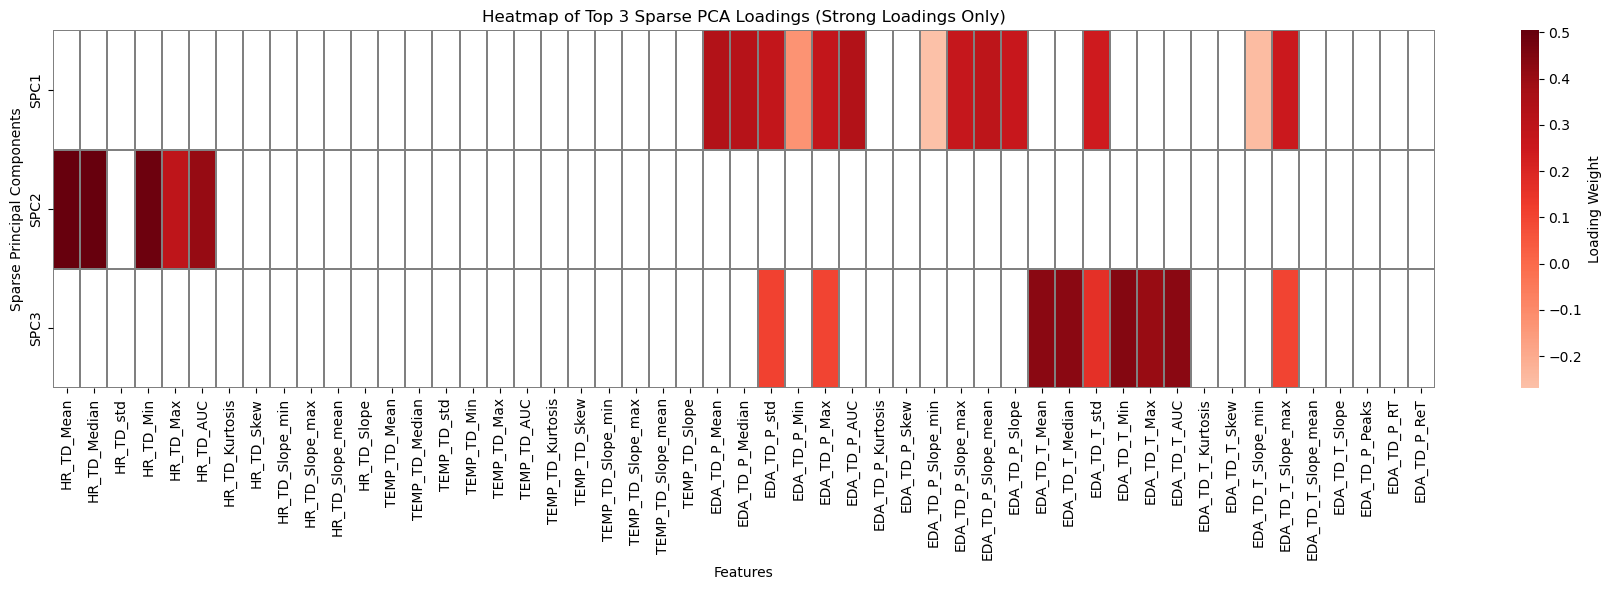

In [7]:
# Show only the top 3 components (first 3 rows)
top_n = 3
masked_loadings_top3 = masked_loadings.iloc[:top_n]

# Plot heatmap
plt.figure(figsize=(18, 6))  # Reduce height to match fewer rows
sns.heatmap(
    masked_loadings_top3,
    cmap='Reds',
    center=0,
    linewidths=0.2,
    linecolor='gray',
    cbar_kws={'label': 'Loading Weight'},
    square=False
)
plt.title('Heatmap of Top 3 Sparse PCA Loadings (Strong Loadings Only)')
plt.xlabel('Features')
plt.ylabel('Sparse Principal Components')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


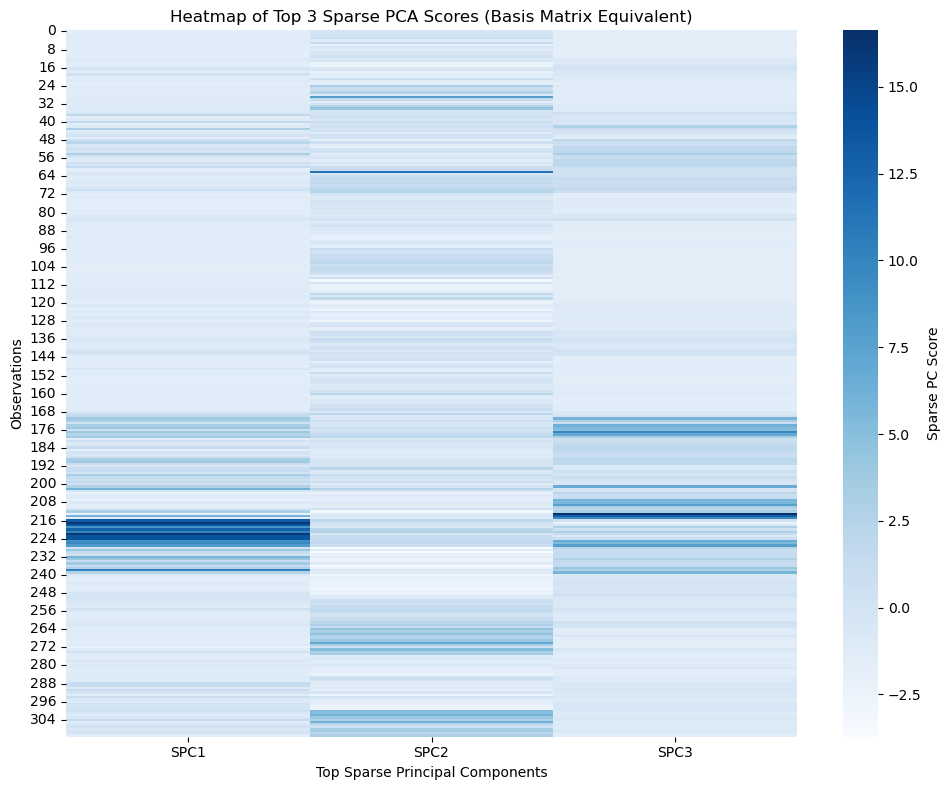

In [15]:
# Keep only the top 3 sparse principal components
top_n = 3
X_sparse_df_top3 = X_sparse_df.iloc[:, :top_n]

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust width to match fewer columns
sns.heatmap(
    X_sparse_df_top3,
    cmap='Blues',
    cbar_kws={'label': 'Sparse PC Score'}
)
plt.title('Heatmap of Top 3 Sparse PCA Scores (Basis Matrix Equivalent)')
plt.xlabel('Top Sparse Principal Components')
plt.ylabel('Observations')
plt.tight_layout()
plt.show()


In [154]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

# Load the sparse PCA reduced dataset
data = pd.read_csv('reduced_dataset_sparsepca.csv')  

# Define the emotion target variables
emotion_targets = ['Frustrated', 'upset', 'hostile', 'alert', 'ashamed',
                   'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']

# Separate features and targets
X = data.iloc[:, :16]         # First 16 columns are SPC1–SPC16
Y = data[emotion_targets]     # Emotion scores

# Initialize cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results_sparse_pca = {}

# Train model for each emotion
for emo in emotion_targets:
    y = Y[emo]

    model = LinearRegression()
    r2_scores = []
    rmse_scores = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2_scores.append(r2_score(y_test, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    results_sparse_pca[emo] = {
        'R2_mean': np.mean(r2_scores),
        'RMSE_mean': np.mean(rmse_scores)
    }

# Format results into DataFrame
results_sparse_df = pd.DataFrame(results_sparse_pca).T

# Calculate overall performance
avg_r2 = results_sparse_df['R2_mean'].mean()
avg_rmse = results_sparse_df['RMSE_mean'].mean()

print("\nResults for Sparse PCA:")
print(results_sparse_df)
print(f"\nAverage R² across all emotions: {avg_r2:.4f}")
print(f"Average RMSE across all emotions: {avg_rmse:.4f}")



Results for Sparse PCA:
             R2_mean  RMSE_mean
Frustrated  0.035949   1.927908
upset      -0.110919   0.618899
hostile    -0.033990   0.260118
alert       0.062522   0.999316
ashamed    -0.157140   0.546691
inspired   -0.020520   1.023980
nervous    -0.012467   0.577667
attentive   0.004463   1.093507
afraid     -0.129465   0.266935
active      0.123434   1.081368
determined  0.020291   1.081494

Average R² across all emotions: -0.0198
Average RMSE across all emotions: 0.8616


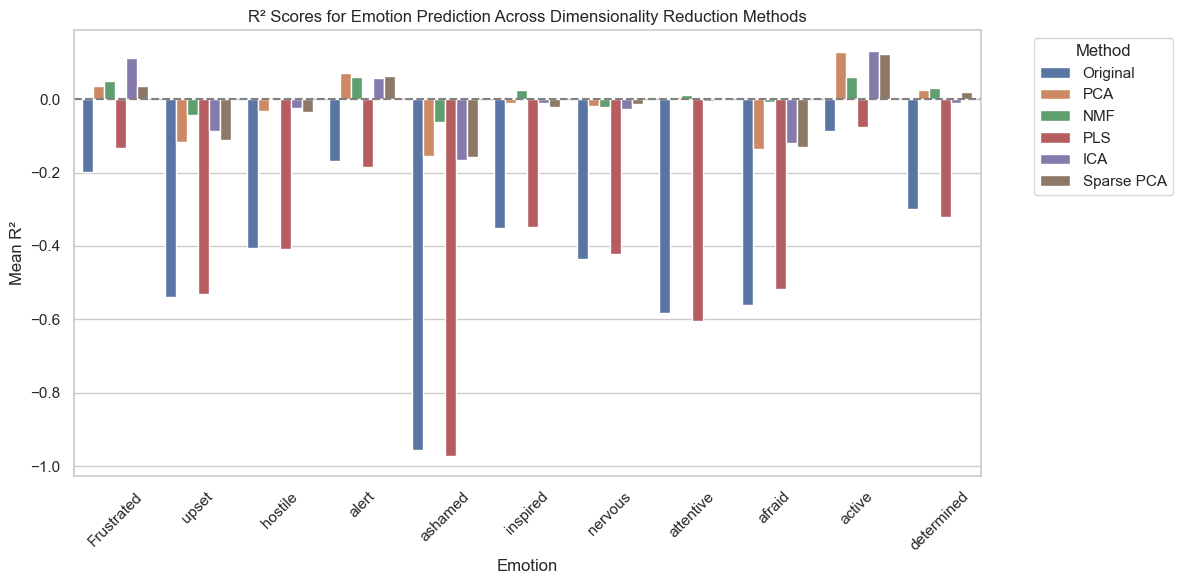

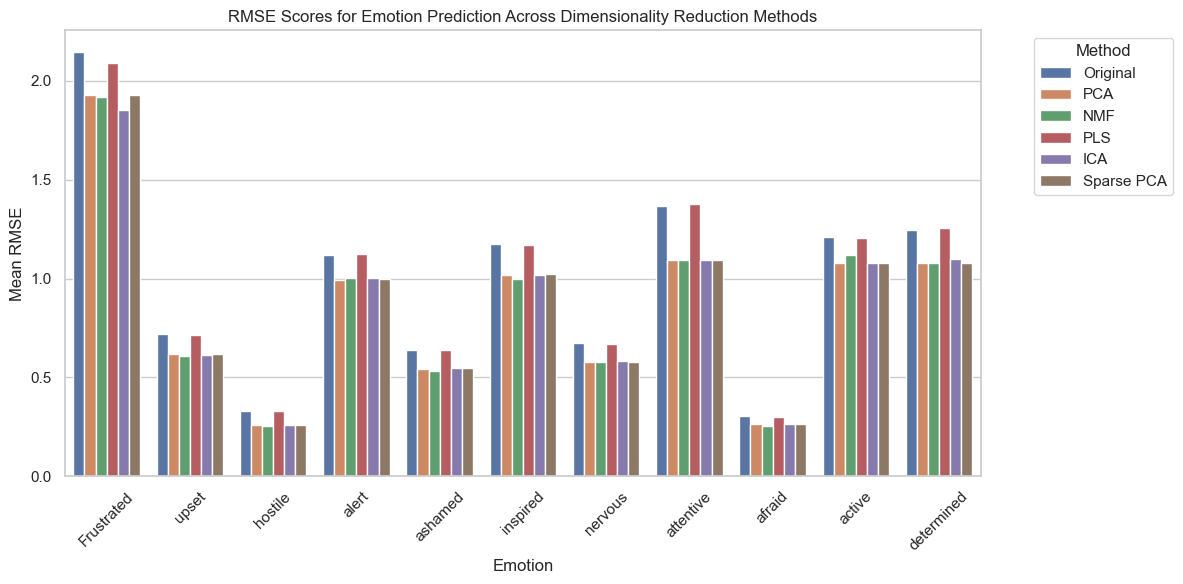

In [156]:
# Add a 'Method' column to each results DataFrame
results_original_df['Method'] = 'Original'
results_df_pca['Method'] = 'PCA'
results_nmf_df['Method'] = 'NMF'
results_pls_df['Method'] = 'PLS'
results_ica_df['Method'] = 'ICA'
results_sparse_df['Method'] = 'Sparse PCA'

# Combine into a single long-form DataFrame
all_results = pd.concat([
    results_original_df,
    results_df_pca,
    results_nmf_df,
    results_pls_df,
    results_ica_df,
    results_sparse_df
])

# Reset index to preserve emotion name as a column
all_results = all_results.reset_index().rename(columns={'index': 'Emotion'})

plt.figure(figsize=(12, 6))
sns.barplot(
    data=all_results,
    x='Emotion',
    y='R2_mean',
    hue='Method'
)
plt.title('R² Scores for Emotion Prediction Across Dimensionality Reduction Methods')
plt.ylabel('Mean R²')
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=all_results,
    x='Emotion',
    y='RMSE_mean',
    hue='Method'
)
plt.title('RMSE Scores for Emotion Prediction Across Dimensionality Reduction Methods')
plt.ylabel('Mean RMSE')
plt.xticks(rotation=45)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
